In [82]:
import pandas as pd
import os
import datetime as dt
import random
import matplotlib.pyplot as plt

**Key Word Searches**

Tweets were collected between 2017-09-12 and 2017-10-27 in the new england area.

In [5]:
keywords = os.listdir("raw-tweets/")

In [46]:
tweet_dictionary = {}

print "Tweet counts for entire period for specific words" 

for word in keywords:
    tweet_dictionary[word] = []
    days = os.listdir("raw-tweets/{}/".format(word))
    total_tweets = 0
    for day in days:
        with open("raw-tweets/{}/{}".format(word, day)) as f:
            tweet_day = f.readlines()
            tweet_dictionary[word].extend(tweet_day) 
    total_tweets = len(tweet_dictionary[word])
    print "{} : {}".format(word, total_tweets)


Tweet counts for entire period for specific words
solar : 282
tree : 1041
leaf : 1393
autumn : 1622
wind : 7086
nature : 1660
foliage : 913
fall : 7277
turbine : 1


In [47]:
print "Random Tweets for each keyword other than turbine (only had 1 tweet)"

try:
    del tweet_dictionary['turbine']
except KeyError:
    pass
              
for word in tweet_dictionary.keys():
    print word
    for random_tweet in random.sample(tweet_dictionary[word], 5):
        print random_tweet.strip()
    print "________________________________"  

Random Tweets for each keyword other than turbine (only had 1 tweet)
leaf
plus the ground looks pretty when it's blanketed in color

Leaf peeping and eating WAY too much = Perfect weekend! @ Phoenicia Diner https://t.co/8zdTP12fyx
One brother leaves another arrives - Drinking a Free Rise (Dry Hopped W/ Galaxy) @ Three C's Drinking - https://t.co/wSnzNmJtgd
@CrossingNewLeaf  Just 5 more hours for Jason..... https://t.co/pkl9eOz77h
________________________________
foliage
.
Fall for me.              #punny #autumn #leaves #foliage #hudsonvalley #maskerorchards @ Masker Orchards https://t.co/Ab2zgxoJkJ
#foliage #vermont #cows @ Warren, Vermont https://t.co/DWwaO5vIq9
#nofilter #vermont #ladies #nature #fallfoliage #serene  https://t.co/tIHxcwHiIX
.mother.  #whatafeeling #views #fallfoliage ...such an unforgettable day with ohheyitsolgie,  https://t.co/IDAsbeRSw6
________________________________
nature
.
.
Nothing says "good morning" like a rousing debate on set theory and the nature of in

**Time series analysis**

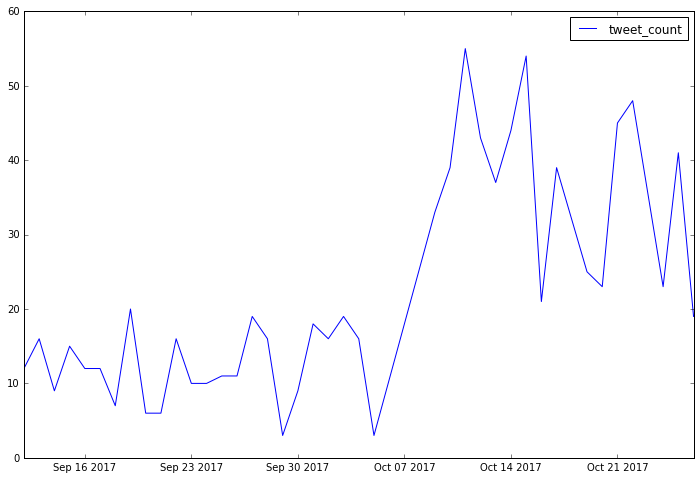

In [84]:
%matplotlib inline

word = "foliage"
days = os.listdir("raw-tweets/{}/".format(word))

time_dict = {}

for day in days:
    year = day[:4]; month= day[5:7]; d = day[8:]
    date = dt.date(int(year), int(month), int(d))
    with open("raw-tweets/{}/{}".format(word, day)) as f:
        tweet_day = f.readlines()
        time_dict[date] = len(tweet_day)
        
date_counts = pd.DataFrame.from_dict(time_dict, orient = 'index')
date_counts.columns = ['tweet_count']
date_counts.sort_index()
f, ax = plt.subplots( figsize=(12,8))
date_counts.plot(y='tweet_count', ax= ax)

In [ ]:
s = dt.datetime.strptime